In [ ]:
# Install Mecab
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip install mecab-python3
# install Konlpy
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [66.5 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://cloud.r-project.org/

In [ ]:
import re
import pandas as pd
# import math
# import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/LDA분석할파일_명소_외국인.csv', encoding='cp949')

In [ ]:
df.head()
galexy_posts = df.get('name') + " " + df.get('reviews')

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

In [ ]:
# import MeCab
# m = MeCab.Tagger()
# out = m.parse("정말 어렵게 설치를 했다.")
# print(out)

/Users/ji_brisbane/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1=df.drop_duplicates()
print(df1.isna().sum()) # 결측치 확인

In [ ]:
df1_stop_words = "디, 는, 가, 이, 와, 우, 대구, 수, 곳, 거, 원, 만, 밤, 곳"
df1_stop_words = df1_stop_words.split(' ')
print(df1_stop_words[0:20])

['디,', '는,', '가,', '이,', '와,', '우,', '대구,', '수,', '곳,', '거,', '원,', '만,', '밤,', '곳']


In [ ]:
# words = []
# for post in df1['reviews']:
# #     words.extend(tagger.pos(post))
# words[0:30]

/Users/ji_brisbane/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1_nouns = []
for post in df['reviews']:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in df1_stop_words :
                df1_nouns.append(noun)
                
df1_nouns[0:30]

['애',
 '이월드',
 '그릴',
 '야경',
 '맛집',
 '굿',
 '놀이',
 '기구',
 '탑승',
 '그쪽',
 '기구',
 '안내',
 '바닥',
 '조심',
 '주의',
 '생각',
 '기구',
 '탑승',
 '당',
 '기구',
 '정강',
 '허리',
 '손목',
 '애기',
 '애기',
 '머리',
 '덕분',
 '부산',
 '놀러',
 '구개']

In [ ]:
##명사빈도계산
from collections import Counter #상위 30개 명사
num_top_nouns = 30
df1_nouns_counter=Counter(df1_nouns)
df1_top_nouns = df1_nouns_counter.most_common(num_top_nouns)
df1_top_nouns

[('수', 4801),
 ('대구', 3833),
 ('것', 2828),
 ('산책', 2713),
 ('공원', 2429),
 ('아이', 2377),
 ('사람', 2137),
 ('제공', 1961),
 ('번역', 1885),
 ('원문', 1805),
 ('장소', 1636),
 ('시간', 1454),
 ('시장', 1451),
 ('때', 1307),
 ('번', 1275),
 ('동물', 1232),
 ('거', 1173),
 ('방문', 1142),
 ('만', 1137),
 ('생각', 1102),
 ('체험', 1073),
 ('공간', 1009),
 ('듯', 998),
 ('운동', 985),
 ('주차', 958),
 ('길', 926),
 ('게', 916),
 ('사진', 890),
 ('가족', 878),
 ('거리', 876)]

In [ ]:
df1_top_nouns = dict(df1_top_nouns) #사전형태로 변환

In [ ]:
print(df1_top_nouns)

{'수': 4801, '대구': 3833, '것': 2828, '산책': 2713, '공원': 2429, '아이': 2377, '사람': 2137, '제공': 1961, '번역': 1885, '원문': 1805, '장소': 1636, '시간': 1454, '시장': 1451, '때': 1307, '번': 1275, '동물': 1232, '거': 1173, '방문': 1142, '만': 1137, '생각': 1102, '체험': 1073, '공간': 1009, '듯': 998, '운동': 985, '주차': 958, '길': 926, '게': 916, '사진': 890, '가족': 878, '거리': 876}


In [ ]:
# #유사어를 통폐합한 후 명사 빈도수 계산
# df1_nouns_counter = Counter(df1_nouns)
# df1_nouns_counter[''] += df1_nouns_counter['스마트']
# df1_nouns_counter.pop('스마트')##'스마트'를 '스마트폰'으로 간주하여 빈도수 계산하고 스마트는 제외

# df1_nouns_counter['삼성'] += df1_nouns_counter['삼성전자']
# df1_nouns_counter.pop('삼성전자')

# num_top_nouns =30
# df1_top_nouns = df1_nouns_counter.most_common(num_top_nouns)
# df1_top_nouns

/Users/ji_brisbane/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1_top_nouns = dict(df1_top_nouns)

In [ ]:
##TF-IDF계산
from sklearn.feature_extraction.text import TfidfVectorizer
df1_tfidv = TfidfVectorizer().fit(df1_top_nouns)
# df1_tfidv.transform(galexy_posts).toarray()

print(df1_tfidv.transform(galexy_posts).toarray())

# tfidfv = TfidfVectorizer().fit(corpus)
# print(tfidfv.transform(corpus).toarray())

ValueError: ignored

In [ ]:
##테이블형태로 살펴보기
pd.DataFrame(df1_tfidv.transform(galexy_posts).toarray())
df2=pd.DataFrame(df1_tfidv.transform(df1_posts).toarray())
df2[100:110]

ValueError: ignored

In [ ]:
import re 
import networkx as nx

In [ ]:
df1_nouns = []
for post in galexy_posts:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in df1_stop_words:
                df1_nouns.append(noun)

df1_nouns[0:30]

['이월드',
 '이월드',
 '이월드',
 '이월드',
 '애',
 '이월드',
 '이월드',
 '그릴',
 '야경',
 '맛집',
 '이월드',
 '굿',
 '이월드',
 '이월드',
 '놀이기구',
 '탑승',
 '그쪽',
 '기구',
 '안내',
 '바닥',
 '조심',
 '주의',
 '생각',
 '기구',
 '탑승',
 '당',
 '기구',
 '정강',
 '허리',
 '손목']

In [ ]:
##상위 20개 명사 추출

In [ ]:
# #유사어를 통폐합한 후 명사 빈도수 계산
# df1_nouns_counter = Counter(df1_nouns)
# df1_nouns_counter['스마트폰'] += df1_nouns_counter['스마트']
# df1_nouns_counter.pop('스마트')##'스마트'를 '스마트폰'으로 간주하여 빈도수 계산하고 스마트는 제외

# df1_nouns_counter['삼성'] += df1_nouns_counter['삼성전자']
# df1_nouns_counter.pop('삼성전자')

# num_top_nouns =20
# df1_top_nouns = df1_nouns_counter.most_common(num_top_nouns)
# df1_top_nouns

KeyError: '스마트'

In [ ]:
print(df1_top_nouns)

{}


In [ ]:
##상위 단어 top_nouns에 대해서는 key에 해당하는 단어, value 에 해당하는 id를 넣어 딕서녀리형태로 저장
df1_word2id = {w: i for i, w in enumerate(df1_top_nouns.keys())}
df1_word2id

{'가족': 28,
 '거': 16,
 '거리': 29,
 '것': 2,
 '게': 26,
 '공간': 21,
 '공원': 4,
 '길': 25,
 '대구': 1,
 '동물': 15,
 '듯': 22,
 '때': 13,
 '만': 18,
 '방문': 17,
 '번': 14,
 '번역': 8,
 '사람': 6,
 '사진': 27,
 '산책': 3,
 '생각': 19,
 '수': 0,
 '시간': 11,
 '시장': 12,
 '아이': 5,
 '운동': 23,
 '원문': 9,
 '장소': 10,
 '제공': 7,
 '주차': 24,
 '체험': 20}

In [ ]:
##인적행렬 생성
#상위 단어들에 대해서 상위갯수만큼 인접행렬 만들고 word2id사용 가중치가 o이상이면 서로 연결
import numpy as np
df1_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in df1_sentences_nouns:
    for wi, i in df1_word2id.items():
        if wi in sentence:
            for wj, j in df1_word2id.items():
                if i !=j and wj in sentence:
                    df1_adjacent_matrix[i][j] += 1
df1_adjancent_matrix

NameError: ignored

In [ ]:
!pip install gensim

In [ ]:
#######토픽모델링##########
##명사추출하기
df1_nouns = []
nouns = []
for post in galexy_posts:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in df1_stop_words:
                nouns.append(noun)
        df1_nouns.append(nouns)
    else:
        df1_nouns_append(['nouns'])

df1_nouns[0:10]

NameError: ignored

In [ ]:
import gensim
galexy_bigram = gensim.models.Phrases(galexy_nouns)
galexy_trigram = gensim.models.Phrases(galexy_bigram[galexy_nouns])
galexy_bigram_model = gensim.models.phrases.Phraser(galexy_bigram)
galexy_trigram_model = gensim.models.phrases.Phraser(galexy_trigram)

NameError: ignored

In [ ]:
from gensim import corpora
galexy_bigram_document = [galexy_bigram_model[nouns] for nouns in galexy_nouns]
galexy_bigram_document[1]

NameError: name 'galexy_nouns' is not defined

In [ ]:
galexy_id2word = corpora.Dictionary(galexy_bigram_document)
galexy_corpus = [galexy_id2word.doc2bow(doc) for doc in galexy_bigram_document]
galexy_corpus[0]
##bigram문서에 대해서 id와 word로 매핑된 딕셔너리를 생성 그리고 doc2bow함수를 통해서 (단어, 빈도수)형태로 만들어줌

NameError: name 'galexy_bigram_document' is not defined

In [ ]:
df1_id2word[2000]#2000번째가 무엇인지 확인

NameError: name 'df1_id2word' is not defined

In [ ]:
##Topic Coherence계산
from gensim.models import CoherenceModel

galexy_coherence_score=[]
for i in range(2,10):
    model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=i)
    coherence_model = CoherenceModel(model, texts=galexy_bigram_document, dictionary=galexy_id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('n=',i,'\nCoherence Score: ', coherence_lda)
    galexy_coherence_score.append(coherence_lda)

NameError: name 'galexy_corpus' is not defined

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

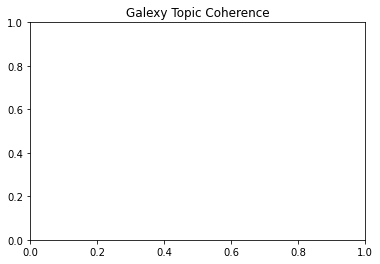

In [ ]:
import matplotlib.pyplot as plt
import numpy

k=[]
for i in range(2,10):
    k.append(i)

x=numpy.array(k)
y=numpy.array(galexy_coherence_score)
plt.title('Galexy Topic Coherence')
plt.plot(x,y)
plt.xlim(2,10)
plt.xlabel('Number Of Topic (2-10)')
plt.ylabel('Cohrence Score')
plt.show()

In [ ]:
galexy_model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=3)
galexy_model.print_topics()

NameError: name 'galexy_corpus' is not defined

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6 MB 1.4 MB/s eta 0:00:01     |██████████████████▉             | 952 kB 1.4 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=48cdadf15fccfc0152720604ed7485cd0d04d93171973a8871227b85c70a5d97
  Stored in directory: /Users/ji_brisbane/Library/Caches/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
prepared_data = gensimvis.prepare(galexy_model, galexy_corpus, galexy_id2word)
pyLDAvis.display(prepared_data)

##시각화할수있음

NameError: name 'galexy_model' is not defined

In [ ]:
##동적토픽모델링 시간에 따라서 분류가능
galexy_nouns_date={}
for i in range(len(galexy_posts)):
    if galexy_post_date[i] in galexy_nouns_date:
        galexy_nouns_date[galexy_post_date[i]].append(galexy_nouns[i])
    else:
        galexy_nouns_date[galexy_post_date[i]]=[]
        galexy_nouns_date[galexy_post_date[i]].append(galexy_nouns[i])

galexy_nouns_date = sorted(galexy_nouns_date.items())
galexy_nouns_date[0]

/Users/ji_brisbane/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'galexy_posts' is not defined